<b>Web Analytics DATA 620 - Project 02</b>

<b>Assignment: “Wiki Publishing”</b>

<b>Group - Chris Bloome / Mustafa Telab / Vinayak Kamath</b>

<b>Date - 24th June 2021</b>

--- 


Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

---

<b>Wikipedia User Publishing</b>



The source of the data is http://networkrepository.com/ia-wiki-user-edits-page.php#

The data is a collection of edges that represent users and wikipedia pages; while the edges represent a edit events.

 - User
 - Web page
 - Weight
 - Time Stamp

---

In [2]:
# Import required libraries
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyvis.network import Network
from datetime import datetime
from scipy.stats import zscore

In [3]:
df = pd.read_csv('ia-wiki-user-edits-page.edges', sep = ' ',header = None, names = ['source','target','weight','time'])

In [4]:
#df['hour'] = [int(datetime.utcfromtimestamp(v).strftime('%H')), for v in df['time']]
#df['month'] = [int(datetime.utcfromtimestamp(v).strftime('%m')) for v in df['time']]
#df['year'] = [int(datetime.utcfromtimestamp(v).strftime('%Y')) for v in df['time']]
df['date'] = [datetime.utcfromtimestamp(v).strftime('%Y-%m-%d') for v in df['time']]

In [5]:
df['hour'] = pd.to_datetime(df['date']).dt.strftime("%H")

In [6]:
df['source'] = ['u'+ str(v) for v in df['source']]
df['target'] = ['p'+ str(v) for v in df['target']]

In [72]:
df['date'] = pd.to_datetime(df['date'])
maxyear = df['date'].dt.year.max()

In [74]:
df = df[df['date'].dt.year == maxyear]
print(len(df))

1873945


In [75]:
u198 = df[df['source']=='u198'].groupby('date').aggregate({('weight'):np.sum}).sort_values(by = 'date', ascending = True).reset_index()

In [76]:
u198['date'] = pd.to_datetime(u198['date'], format = '%Y-%m-%d')
r = pd.date_range(start= u198.date.min(), end = u198.date.max())
u198 = u198.set_index('date').reindex(r, fill_value=0)#.reindex(r)#.fillna(0).rename_axis('date').reset_index()

/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


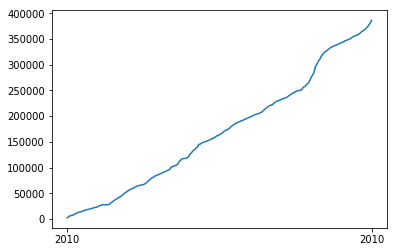

In [77]:
plt.plot(r,pd.Series(u198['weight']).cumsum())
plt.xticks([min(r), max(r)])
plt.show()

In [78]:
df_frequency_step = df.groupby(['source','date']).aggregate({('weight'):np.sum}).sort_values('weight').reset_index()

In [79]:
df_frequency = df_frequency_step.groupby(['source']).aggregate({('weight'):np.average}).sort_values('weight').reset_index()

In [80]:
df_frequency.columns = ['source', 'frequency']
df_frequency

source     frequency
0      u9999      1.000000
1     u20535      1.000000
2     u20537      1.000000
3     u20544      1.000000
4     u29112      1.000000
...      ...           ...
5158   u1405    889.338710
5159    u198   1603.626556
5160  u18229   2388.636364
5161    u232   2647.189189
5162    u680  13261.375000

[5163 rows x 2 columns]

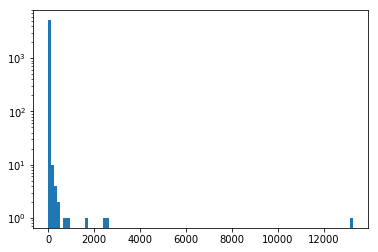

In [81]:
plt.hist(df_frequency['frequency'], bins = 100 )
plt.yscale('log')
plt.show()

/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/mustafatelab/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


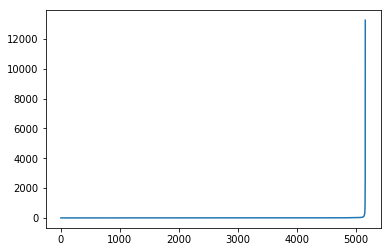

In [82]:
plt.plot(df_frequency.index, df_frequency.frequency)
plt.show()

In [83]:
df_grouped = df.groupby(['source','target']).aggregate({('weight'):np.sum}).reset_index()
#,('date'):np.average,('month'):np.average

In [84]:
u_count = df_grouped['source'].value_counts(ascending=True).rename_axis('source').reset_index(name='pages')
p_count = df_grouped['target'].value_counts(ascending=True).rename_axis('target').reset_index(name='users')

In [85]:
p_count

target  users
0        p1360075      1
1        p1693336      1
2        p1577044      1
3        p1458539      1
4        p1150526      1
...           ...    ...
1022339  p1936168    108
1022340      p590    121
1022341   p117268    128
1022342   p183627    135
1022343   p348358    140

[1022344 rows x 2 columns]

In [86]:
u_count

source   pages
0     u19136       1
1     u19146       1
2      u5419       1
3     u28504       1
4     u20119       1
...      ...     ...
5158    u232   88549
5159    u193  111403
5160    u845  134132
5161    u680  212041
5162    u198  304980

[5163 rows x 2 columns]

In [87]:
df_grouped = pd.merge(df_grouped, u_count, how="left", on="source")
df_grouped = pd.merge(df_grouped, p_count, how="left", on="target")
df_grouped = pd.merge(df_grouped, df_frequency, how="left", on="source")

In [88]:
user_stats = u_count["pages"].describe().round(2)
page_stats = p_count["users"].describe().round(2)
freq_stats = df_frequency["frequency"].describe().round(2)
print('Pages Per User Statisitics')
print(user_stats, '\n')
print('Users Per Page Statisitics')
print(page_stats, '\n')
print('Edit Daily Frequency Statisitics')
print(freq_stats)

Pages Per User Statisitics
count      5163.00
mean        292.04
std        6012.43
min           1.00
25%           1.00
50%           1.00
75%           4.00
max      304980.00
Name: pages, dtype: float64 

Users Per Page Statisitics
count    1022344.00
mean           1.47
std            1.11
min            1.00
25%            1.00
50%            1.00
75%            2.00
max          140.00
Name: users, dtype: float64 

Edit Daily Frequency Statisitics
count     5163.00
mean         8.15
std        193.70
min          1.00
25%          1.00
50%          1.40
75%          2.71
max      13261.38
Name: frequency, dtype: float64


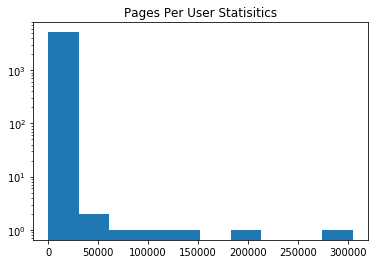

In [89]:
plt.hist(u_count['pages'], bins = 10)
plt.title('Pages Per User Statisitics')
plt.yscale('log')

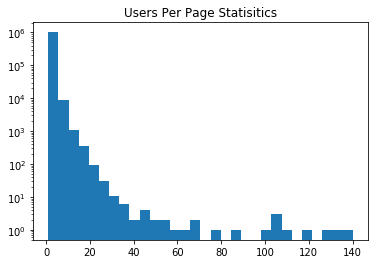

In [90]:
plt.hist(p_count['users'], bins = 30)
plt.title('Users Per Page Statisitics')
plt.yscale('log')

In [91]:
print(len(df_grouped))
print(df_grouped.head())

1507809
  source    target  weight  pages  users  frequency
0    u10   p151715       1     11      4      1.875
1    u10    p15829       2     11      2      1.875
2    u10  p1668464       9     11      3      1.875
3    u10   p348358       4     11    140      1.875
4    u10    p35699       1     11     13      1.875


In [92]:
freq_std = freq_stats['std']
user_min = user_stats['75%']
page_min = page_stats['75%']
df_island = df_grouped[(df_grouped['pages']>user_min)  & (df_grouped['users']>page_min) & (df_grouped['frequency'] < (freq_std * 5))]
len(df_island)

249731

In [93]:
S = nx.from_pandas_edgelist(df_island, source='source', target='target', edge_attr=["weight"], create_using = nx.DiGraph(), edge_key=None)

In [94]:
print(nx.info(S))

Name: 
Type: DiGraph
Number of nodes: 85611
Number of edges: 249731
Average in degree:   2.9170
Average out degree:   2.9170


In [95]:
len(list(nx.connected_components(S.to_undirected())))

1

In [101]:
users = [v for v in S.nodes() if v[0]== 'u']
len(users)

1092

In [102]:
pages = [v for v in S.nodes() if v[0]== 'p']
len(pages)

84519

In [109]:
#P = bipartite.projected_graph(S.to_undirected(), pages)

In [103]:
U = bipartite.projected_graph(S.to_undirected(), users)

In [ ]:
bipartite.collaboration_weighted_projected_graph(B, [0, 2, 4, 5])

In [110]:
print(nx.info(U))

Name: 
Type: Graph
Number of nodes: 1092
Number of edges: 59775
Average degree: 109.4780


In [111]:
sorted(nx.degree_centrality(U).items(), key=lambda x: x[1], reverse=True)[:10]

[('u193', 0.9184234647112741),
 ('u203', 0.8652612282309807),
 ('u134', 0.8075160403299725),
 ('u25', 0.7341888175985335),
 ('u239', 0.7222731439046747),
 ('u333', 0.7048579285059579),
 ('u106', 0.6691109074243813),
 ('u83', 0.6553620531622365),
 ('u240', 0.6443629697525206),
 ('u79', 0.6379468377635197)]

In [112]:
sorted(dict(U.to_undirected().degree()).items(), key=lambda x: x[1], reverse=True)[:10]

[('u193', 1002),
 ('u203', 944),
 ('u134', 881),
 ('u25', 801),
 ('u239', 788),
 ('u333', 769),
 ('u106', 730),
 ('u83', 715),
 ('u240', 703),
 ('u79', 696)]

In [113]:
sorted(dict(nx.eigenvector_centrality(U)).items(), key=lambda x: x[1], reverse=True)[:10]

[('u134', 0.09340336731347809),
 ('u193', 0.09255061273093777),
 ('u203', 0.09099597505856727),
 ('u25', 0.09075453030227688),
 ('u239', 0.09046800680651776),
 ('u333', 0.0896613437121025),
 ('u106', 0.08914981227607732),
 ('u240', 0.08799379721899583),
 ('u83', 0.08776248430376145),
 ('u79', 0.08761221274741664)]

In [114]:
density = nx.density(U)
print(density)
print(nx.is_connected(U.to_undirected()))

0.10034649127224746
True


(array([446., 152., 117.,  91.,  65.,  41.,  30.,  28.,  29.,  16.,  11.,
          9.,   5.,   6.,   7.,  10.,   3.,   4.,   7.,   4.,   2.,   3.,
          0.,   3.,   0.,   0.,   1.,   0.,   1.,   1.]),
 array([1.00000000e+00, 3.43666667e+01, 6.77333333e+01, 1.01100000e+02,
        1.34466667e+02, 1.67833333e+02, 2.01200000e+02, 2.34566667e+02,
        2.67933333e+02, 3.01300000e+02, 3.34666667e+02, 3.68033333e+02,
        4.01400000e+02, 4.34766667e+02, 4.68133333e+02, 5.01500000e+02,
        5.34866667e+02, 5.68233333e+02, 6.01600000e+02, 6.34966667e+02,
        6.68333333e+02, 7.01700000e+02, 7.35066667e+02, 7.68433333e+02,
        8.01800000e+02, 8.35166667e+02, 8.68533333e+02, 9.01900000e+02,
        9.35266667e+02, 9.68633333e+02, 1.00200000e+03]),
 <a list of 30 Patch objects>)

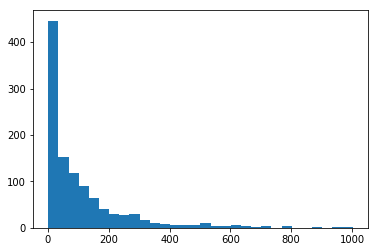

In [115]:
U_degrees = dict(U.degree()).values()
plt.hist(U_degrees, bins = 30)

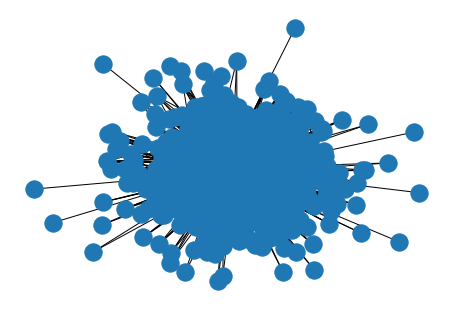

In [116]:
nx.draw(U)

In [117]:
#modifiction of code clock found on Social Network Analysis for Startups, pg64 
def trim_nodes(g, weight=1):
    nodes = []
    for n in g.nodes():
        if g.degree(n) > weight:
            nodes.append(n)
    G2 = g.subgraph(nodes)
    return G2

In [120]:
U2 = trim_nodes(U,100)
print(nx.info(U2))

Name: 
Type: Graph
Number of nodes: 378
Number of edges: 36719
Average degree: 194.2804


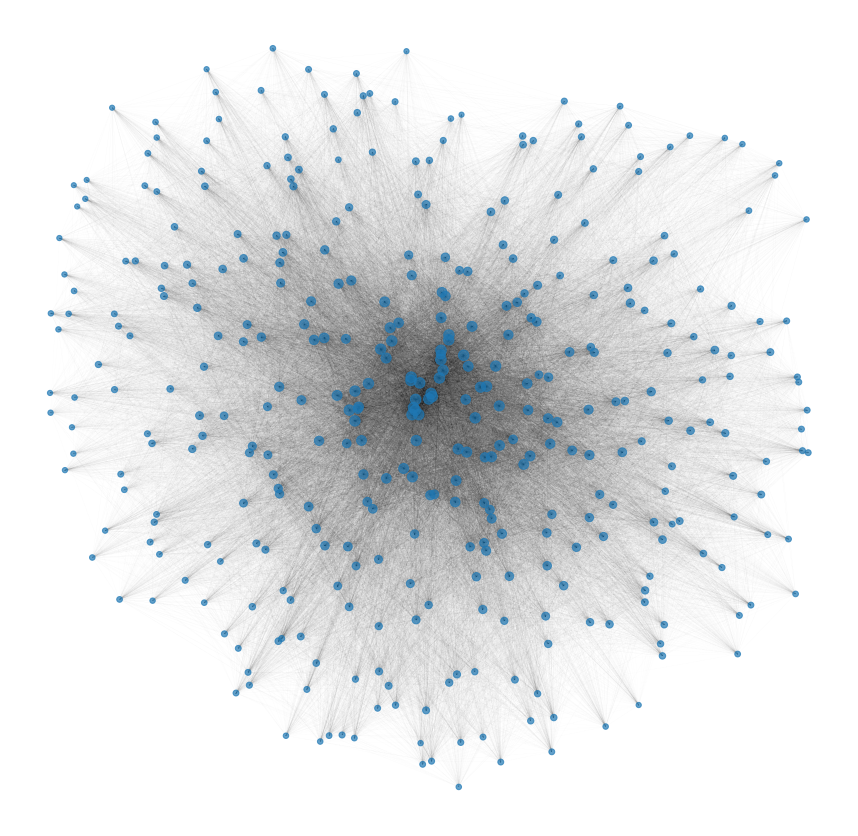

In [121]:
U2_degrees = dict(U2.degree()).values()
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_spring(U2 ,alpha =.7,width = .01, arrows=False , node_size = [v*.3 for v in U2_degrees])

In [138]:
W = bipartite.overlap_weighted_projected_graph(S.to_undirected(),list(U2.nodes()))

In [139]:
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 1092
Number of edges: 58653
Average degree: 107.4231


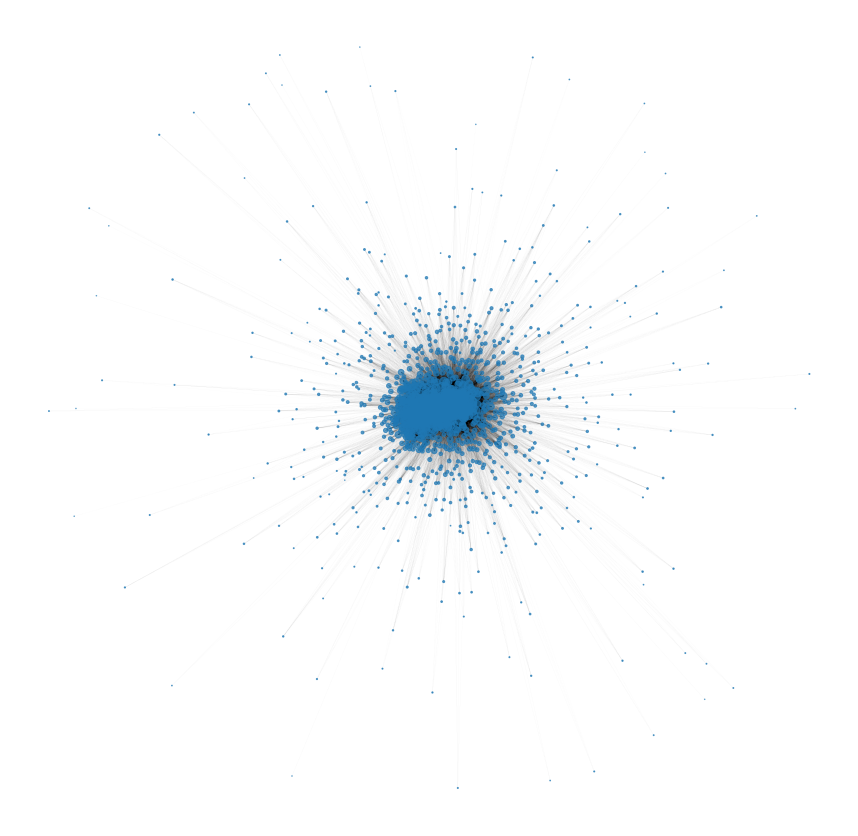

In [140]:
W_degrees = dict(W.degree()).values()
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_spring(W ,alpha =.7,width = .01, arrows=False , node_size = [v*.3 for v in W_degrees])

In [141]:
W2 = trim_nodes(W,100)
print(nx.info(W2))

Name: 
Type: Graph
Number of nodes: 378
Number of edges: 36719
Average degree: 194.2804


In [214]:
W2_stats = pd.Series(W2_weights).describe().round(2)

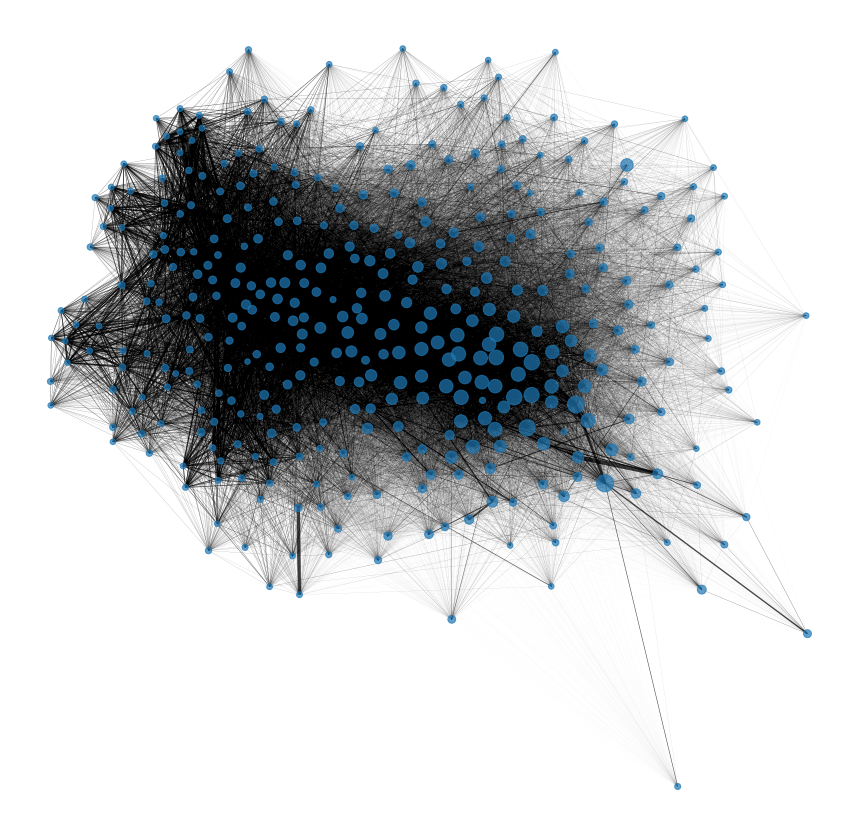

In [193]:
W2_degrees = dict(W2.degree()).values()
W2_weights = [v*10 for v in nx.get_edge_attributes(W2, 'weight').values()]
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(W2 ,alpha =.7,width = W2_weights, arrows=False , node_size = [v*.3 for v in W_degrees])

In [295]:
#modifiction of code clock found on Social Network Analysis for Startups, pg64 
def trim_edges(g, weight=1):
    l = []
    g2 = g.copy(as_view=False)
    for f, to, edata in g.edges(data=True):
            if edata['weight'] < weight:
                l.append((f,to))
    g2.remove_edges_from(l)
    return g2

In [307]:
W3 = trim_edges(W2, W2_stats['50%']/3)
print(nx.info(W3))

Name: 
Type: Graph
Number of nodes: 378
Number of edges: 6429
Average degree:  34.0159


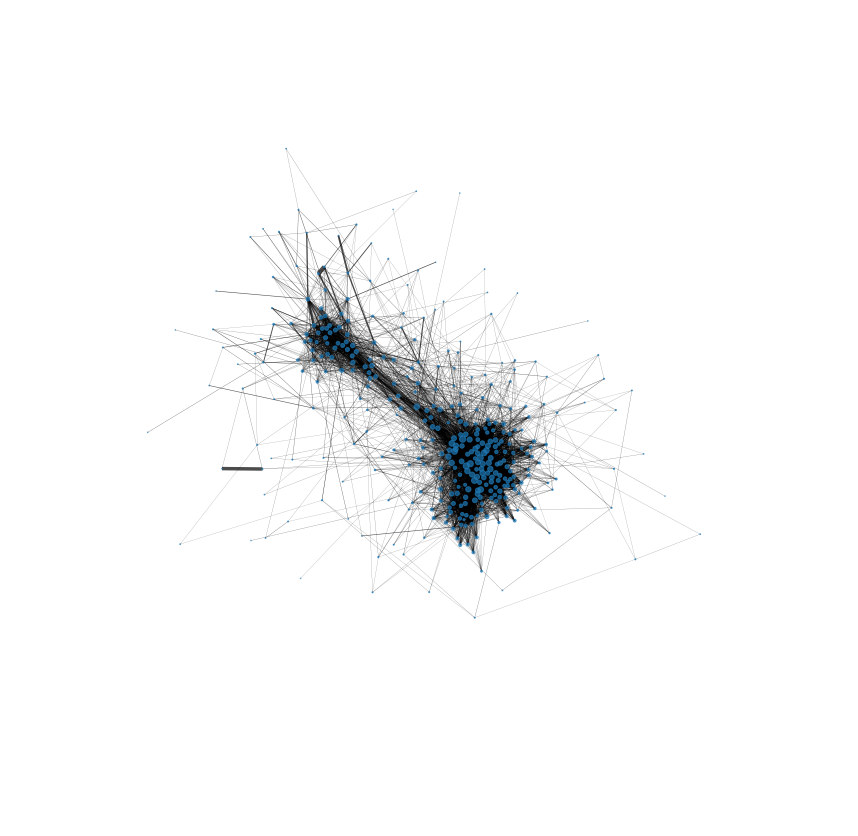

In [308]:
W3_degrees = dict(W3.degree()).values()
W3_weights = [v*10 for v in nx.get_edge_attributes(W3, 'weight').values()]
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_spring(W3 ,alpha =.7,width = W3_weights, arrows=False , node_size = [v*.3 for v in W3_degrees])

In [213]:
W2_stats['25%']

0.02

In [ ]:

__author__ = """\n""".join(['Maksim Tsvetovat <maksim@tsvetovat.org',
'Drew Conway <drew.conway@nyu.edu>',
'Aric Hagberg <hagberg@lanl.gov>'])
from collections import defaultdict
import networkx as nx
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance
import matplotlib.pyplot as plt

def create_hc(G, t=1.0):
    """
    Creates hierarchical cluster of graph G from distance matrix
    Maksim Tsvetovat ->> Generalized HC pre- and post-processing to work on labelled graphs
    and return labelled clusters
    The threshold value is now parameterized; useful range should be determined
    experimentally with each dataset
    """
    """Modified from code by Drew Conway"""
    
    ## Create a shortest-path distance matrix, while preserving node labels
    labels=G.nodes()
    path_length=nx.all_pairs_shortest_path_length(G)
    distances=numpy.zeros((len(G),len(G)))
    i=0
    for u,p in path_length:
        j=0
        for v,d in p.items():
            distances[i][j]=d
            distances[j][i]=d
            if i==j: distances[i][j]=0
            j+=1
        i+=1
        
    # Create hierarchical cluster
    Y=distance.squareform(distances)
    Z=hierarchy.complete(Y) # Creates HC using farthest point linkage
    
    # This partition selection is arbitrary, for illustrive purposes
    membership=list(hierarchy.fcluster(Z,t=t))
    
    # Create collection of lists for blockmodel
    partition=defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        if p>=0:
            partition[p].append(labels[n])
    return list(partition.values())

In [ ]:
#clusters = create_hc(U2)

In [248]:
W2.edges(data = True)

EdgeDataView([('u324', 'u736', {'weight': 0.0029498525073746312}), ('u324', 'u210', {'weight': 0.004721435316336166}), ('u324', 'u72', {'weight': 0.007575757575757576}), ('u324', 'u937', {'weight': 0.003968253968253968}), ('u324', 'u2945', {'weight': 0.0032679738562091504}), ('u324', 'u233', {'weight': 0.003745318352059925}), ('u324', 'u820', {'weight': 0.0043859649122807015}), ('u324', 'u209', {'weight': 0.005952380952380952}), ('u324', 'u655', {'weight': 0.01098901098901099}), ('u324', 'u1405', {'weight': 8.410428931875525e-05}), ('u324', 'u2515', {'weight': 0.03773584905660377}), ('u324', 'u2599', {'weight': 0.0029239766081871343}), ('u324', 'u102', {'weight': 0.001892147587511826}), ('u324', 'u1075', {'weight': 0.0022271714922048997}), ('u324', 'u104', {'weight': 0.0015657620041753654}), ('u324', 'u612', {'weight': 0.0038910505836575876}), ('u324', 'u1479', {'weight': 0.002150537634408602}), ('u324', 'u918', {'weight': 0.0015082956259426848}), ('u324', 'u441', {'weight': 0.00851063

In [249]:
    g2=nx.Graph()
    for f, to, edata in W2.edges(data=True):
            if edata['weight'] > .02:
                print([(f,to,edata)])

[('u324', 'u2515', {'weight': 0.03773584905660377})]
[('u324', 'u627', {'weight': 0.02643171806167401})]
[('u324', 'u199', {'weight': 0.046948356807511735})]
[('u324', 'u1714', {'weight': 0.10714285714285714})]
[('u176', 'u209', {'weight': 0.022573363431151242})]
[('u176', 'u2515', {'weight': 0.037383177570093455})]
[('u176', 'u204', {'weight': 0.026415094339622643})]
[('u176', 'u12259', {'weight': 0.03125})]
[('u176', 'u6261', {'weight': 0.022988505747126436})]
[('u176', 'u2455', {'weight': 0.03488372093023256})]
[('u176', 'u129', {'weight': 0.02680965147453083})]
[('u176', 'u503', {'weight': 0.02403846153846154})]
[('u176', 'u675', {'weight': 0.02127659574468085})]
[('u176', 'u2379', {'weight': 0.0410958904109589})]
[('u176', 'u1498', {'weight': 0.032})]
[('u176', 'u2957', {'weight': 0.024390243902439025})]
[('u176', 'u2883', {'weight': 0.024096385542168676})]
[('u176', 'u14', {'weight': 0.031746031746031744})]
[('u176', 'u2629', {'weight': 0.02702702702702703})]
[('u176', 'u1366', {

[('u200', 'u332', {'weight': 0.026575550493545937})]
[('u200', 'u25', {'weight': 0.02308970099667774})]
[('u568', 'u6298', {'weight': 0.05555555555555555})]
[('u568', 'u3192', {'weight': 0.05})]
[('u568', 'u2251', {'weight': 0.021739130434782608})]
[('u568', 'u4283', {'weight': 0.027777777777777776})]
[('u568', 'u302', {'weight': 0.06060606060606061})]
[('u568', 'u4401', {'weight': 0.03225806451612903})]
[('u568', 'u17721', {'weight': 0.125})]
[('u568', 'u1525', {'weight': 0.05})]
[('u568', 'u415', {'weight': 0.0297029702970297})]
[('u568', 'u2400', {'weight': 0.038461538461538464})]
[('u568', 'u8461', {'weight': 0.15384615384615385})]
[('u568', 'u6909', {'weight': 0.05263157894736842})]
[('u568', 'u15973', {'weight': 0.07142857142857142})]
[('u568', 'u13585', {'weight': 0.05})]
[('u568', 'u11543', {'weight': 0.034482758620689655})]
[('u568', 'u2414', {'weight': 0.14285714285714285})]
[('u568', 'u1314', {'weight': 0.06060606060606061})]
[('u568', 'u2957', {'weight': 0.02941176470588235

[('u494', 'u332', {'weight': 0.020328381548084442})]
[('u494', 'u25', {'weight': 0.03251617296561117})]
[('u1710', 'u4222', {'weight': 0.022222222222222223})]
[('u1115', 'u475', {'weight': 0.03170227429359063})]
[('u1430', 'u66', {'weight': 0.03125})]
[('u1430', 'u2957', {'weight': 0.020833333333333332})]
[('u1430', 'u1105', {'weight': 0.02127659574468085})]
[('u1430', 'u2403', {'weight': 0.02127659574468085})]
[('u1430', 'u2936', {'weight': 0.023809523809523808})]
[('u1430', 'u3814', {'weight': 0.02857142857142857})]
[('u1430', 'u4222', {'weight': 0.025})]
[('u1430', 'u496', {'weight': 0.022222222222222223})]
[('u1430', 'u2397', {'weight': 0.03125})]
[('u6923', 'u1525', {'weight': 0.02040816326530612})]
[('u6923', 'u15520', {'weight': 0.020833333333333332})]
[('u6923', 'u2404', {'weight': 0.03636363636363636})]
[('u6923', 'u5570', {'weight': 0.022727272727272728})]
[('u6923', 'u3014', {'weight': 0.02247191011235955})]
[('u6923', 'u15513', {'weight': 0.044444444444444446})]
[('u6923', 

[('u79', 'u25', {'weight': 0.0531437125748503})]
[('u185', 'u218', {'weight': 0.02176278563656148})]
[('u185', 'u104', {'weight': 0.050922213311948676})]
[('u185', 'u208', {'weight': 0.027599486521181})]
[('u185', 'u530', {'weight': 0.07641365257259297})]
[('u185', 'u3925', {'weight': 0.021052631578947368})]
[('u2417', 'u410', {'weight': 0.024390243902439025})]
[('u5915', 'u655', {'weight': 0.024390243902439025})]
[('u5915', 'u3192', {'weight': 0.022727272727272728})]
[('u5915', 'u4401', {'weight': 0.029411764705882353})]
[('u5915', 'u1525', {'weight': 0.043478260869565216})]
[('u5915', 'u6360', {'weight': 0.029411764705882353})]
[('u5915', 'u2413', {'weight': 0.05263157894736842})]
[('u5915', 'u10366', {'weight': 0.047619047619047616})]
[('u5915', 'u1105', {'weight': 0.027777777777777776})]
[('u5915', 'u20533', {'weight': 0.0625})]
[('u5915', 'u2520', {'weight': 0.027777777777777776})]
[('u5915', 'u410', {'weight': 0.022988505747126436})]
[('u5915', 'u1047', {'weight': 0.0277777777777